In [1]:
# Importing each library and package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Putting the data into a Pandas data frame
df = pd.read_csv("data_2017_2021.csv")

In [3]:
df

,LastName,FirstName,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
0,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",BB,76.0,4.8,6.766,NaN,11.566
1,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",FX,64.0,4.6,7.633,NaN,12.233
2,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",UE,74.0,5.1,6.500,NaN,11.600
3,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",VT,72.0,4.6,8.566,NaN,13.166
4,ABDUL HADI,Farah Ann,w,MAS,25-Jul-21,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,NaN,11.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,de,JESUS,w,FRA,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",VT,19.0,5.4,9.166,0.1,14.466
1041,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",BB,75.0,4.7,6.900,NaN,11.600
1042,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",FX,33.0,4.9,8.000,NaN,12.900
1043,van,POL,w,NED,SUN 25 JUL 2021,Olympic Games,AAqual,"Tokyo, Japan",UE,41.0,5.3,7.833,NaN,13.133


In [4]:
# Checking the shape of the dataset
df.shape

(1045, 14)

In [5]:
# Putting only Difficulty and Execution Score in the data frame
df = df.iloc[:, [10,11]].values

In [6]:
df

array([[4.8  , 6.766],
       [4.6  , 7.633],
       [5.1  , 6.5  ],
       ...,
       [4.9  , 8.   ],
       [5.3  , 7.833],
       [5.   , 9.1  ]])

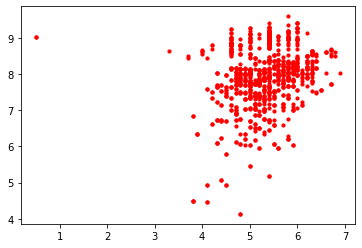

In [7]:
# Creating a scatter plot with the two attributes
plt.scatter(df[:,0], df[:,1], s=10, c="red")

In [8]:
# Import KMeans class to use the elbow method
from sklearn.cluster import KMeans

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


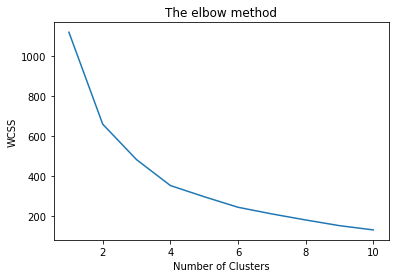

In [9]:
# The elbow method using a for loop
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
# Importing DBSCAN class
from sklearn.cluster import DBSCAN

In [27]:
# Creating DBSCAN object with epsilon and minimum points parameters
dbscan = DBSCAN(eps=0.5, min_samples=3)

In [28]:
# Fitting the data
labels = dbscan.fit_predict(df)

In [29]:
# Outputting the number of clusters
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

Text(0, 0.5, 'Execution Score')

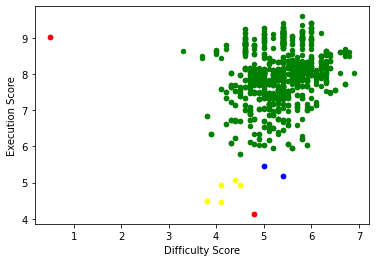

In [34]:
# Plotting the data

plt.scatter(df[labels==-1, 0], df[labels==-1,1], s=20, c="red")
plt.scatter(df[labels==0, 0], df[labels==0,1], s=20, c="green")
plt.scatter(df[labels==1, 0], df[labels==1,1], s=20, c="yellow")
plt.scatter(df[labels==2, 0], df[labels==2,1], s=20, c="blue")

plt.xlabel("Difficulty Score")
plt.ylabel("Execution Score")